In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import joblib

## reading filtered_data.csv

In [2]:
filter_df = pd.read_csv('filtered_data.csv')
filter_df.head()

,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_APPLICATION,AMT_CREDIT_y,NAME_CONTRACT_STATUS,CNT_PAYMENT
0,M,0,202500.0,406597.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,179055.0,179055.0,Approved,24.0
1,F,0,270000.0,1293502.5,1129500.0,State servant,Higher education,Married,House / apartment,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,900000.0,1035882.0,Approved,12.0
2,F,0,270000.0,1293502.5,1129500.0,State servant,Higher education,Married,House / apartment,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,337500.0,348637.5,Approved,6.0
3,F,0,270000.0,1293502.5,1129500.0,State servant,Higher education,Married,House / apartment,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,68809.5,68053.5,Approved,12.0
4,M,0,67500.0,135000.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24282.0,20106.0,Approved,4.0


## checking for null values

In [3]:
print(filter_df.isnull())

         CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0              False         False             False         False   
1              False         False             False         False   
2              False         False             False         False   
3              False         False             False         False   
4              False         False             False         False   
...              ...           ...               ...           ...   
1430150        False         False             False         False   
1430151        False         False             False         False   
1430152        False         False             False         False   
1430153        False         False             False         False   
1430154        False         False             False         False   

         AMT_GOODS_PRICE_x  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0                    False             False                False   
1                    

In [4]:
filter_df.shape

(1430155, 21)

In [5]:
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Data columns (total 21 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   CODE_GENDER                 1430155 non-null  object 
 1   CNT_CHILDREN                1430155 non-null  int64  
 2   AMT_INCOME_TOTAL            1430155 non-null  float64
 3   AMT_CREDIT_x                1430155 non-null  float64
 4   AMT_GOODS_PRICE_x           1430155 non-null  float64
 5   NAME_INCOME_TYPE            1430155 non-null  object 
 6   NAME_EDUCATION_TYPE         1430155 non-null  object 
 7   NAME_FAMILY_STATUS          1430155 non-null  object 
 8   NAME_HOUSING_TYPE           1430155 non-null  object 
 9   CNT_FAM_MEMBERS             1430155 non-null  float64
 10  EXT_SOURCE_3                1430155 non-null  float64
 11  AMT_REQ_CREDIT_BUREAU_HOUR  1430155 non-null  float64
 12  AMT_REQ_CREDIT_BUREAU_DAY   1430155 non-null  float64
 1

## checking for variatoins in the features

In [6]:
filter_df['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [7]:
filter_df['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [8]:
filter_df['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [9]:
filter_df['NAME_CONTRACT_STATUS'].unique()

array(['Approved', 'Canceled', 'Refused', nan, 'Unused offer'],
      dtype=object)

In [10]:
filter_df['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

## finding the best AMT_REQ_CREDIT_BUREAU_* to be used as credit history feature 

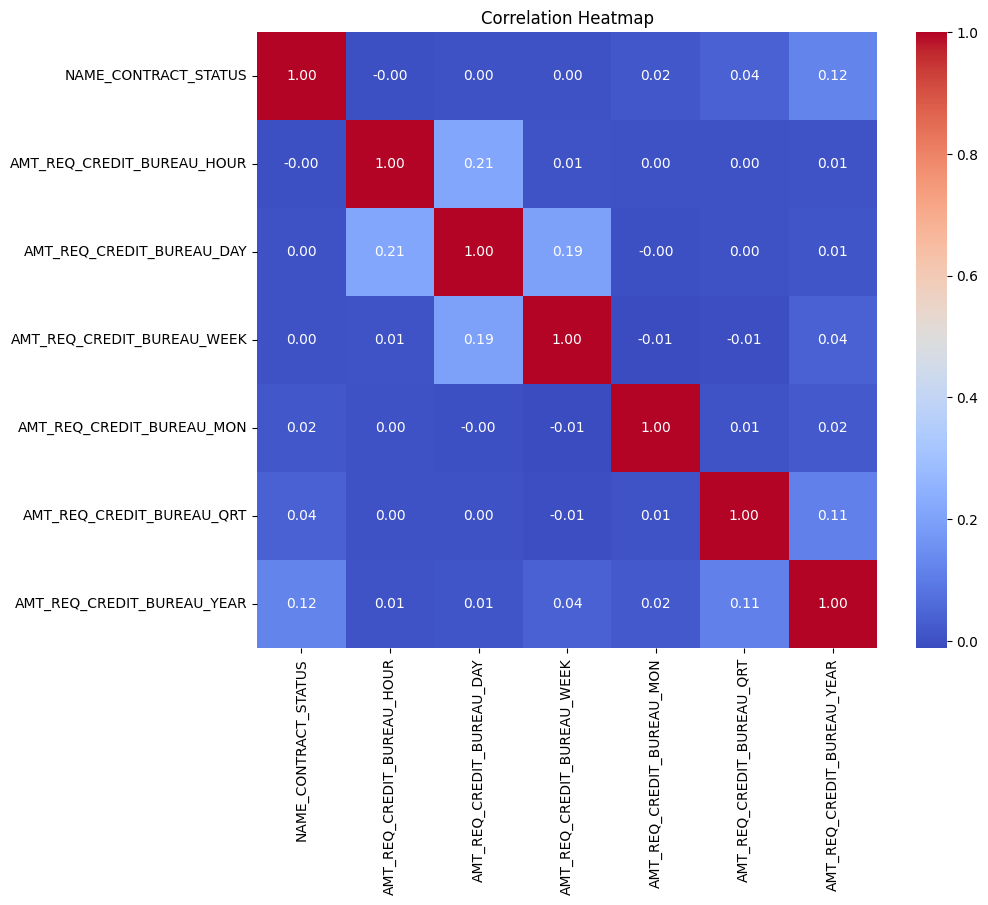

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'filtered_data.csv'
df = pd.read_csv(file_path)

# Filter AMT_REQ_CREDIT_BUREAU_* columns
credit_bureau_columns = [col for col in df.columns if col.startswith('AMT_REQ_CREDIT_BUREAU_')]

# Add target column (ensure it's in the DataFrame)
target_column = 'NAME_CONTRACT_STATUS'  # Replace with the correct column name
df = df[[target_column] + credit_bureau_columns].dropna()

# Encode the target variable if categorical
le = LabelEncoder()
df[target_column] = le.fit_transform(df[target_column])

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()




In [12]:
filter_df['AMT_REQ_CREDIT_BUREAU_YEAR'].unique()

array([ 1.,  0.,  2.,  4.,  5.,  3.,  8.,  6.,  9.,  7., 10., 11., 13.,
       16., 12., 25., 23., 15., 14., 22., 17., 19., 18., 21., 20.])

In [13]:
filter_df['NAME_HOUSING_TYPE'].unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

## encoding 

In [14]:
filter_df['CREDIT_HISTORY_INDICATOR'] = np.where(filter_df['AMT_REQ_CREDIT_BUREAU_YEAR'] > 0, 1, 0)

In [15]:
filter_df['CREDIT_HISTORY_INDICATOR'].unique()

array([1, 0])

In [16]:
income_type_mapping = {
    'Unemployed': 0,
    'Student': 0,
    'Working': 1,
    'State servant': 1,
    'Pensioner': 1,
    'Maternity leave': 1,
    'Commercial associate': 2,
    'Businessman': 2
}


filter_df['INCOME_TYPE_CATEGORY'] = filter_df['NAME_INCOME_TYPE'].map(income_type_mapping)

# Verify the transformation
print(filter_df['INCOME_TYPE_CATEGORY'].unique())


[1 2 0]


In [17]:
# Define the mapping for married (1) and not married (0)
family_status_mapping = {
    'Married': 1,
    'Civil marriage': 1,
    'Single / not married': 0,
    'Widow': 0,
    'Separated': 0,
    'Unknown': 0
}

# Apply the mapping to the column
filter_df['MARRIED_STATUS'] = filter_df['NAME_FAMILY_STATUS'].map(family_status_mapping)

# Verify the transformation
print(filter_df['MARRIED_STATUS'].unique())


[0 1]


In [18]:
filter_df['CNT_CHILDREN'].unique()

array([ 0,  1,  2,  3,  4,  7,  5,  6,  8,  9, 11, 12, 10, 19, 14],
      dtype=int64)

In [19]:
# Define a function to categorize the number of children
def categorize_children(count):
    if count == 0:
        return 0
    elif count == 1:
        return 1
    elif count == 2:
        return 2
    else:
        return 3

# Apply the function to the CNT_CHILDREN column
filter_df['DEPENDENTS'] = filter_df['CNT_CHILDREN'].apply(categorize_children)

# Verify the transformation
print(filter_df['DEPENDENTS'].unique())


[0 1 2 3]


In [20]:
# Define the mapping for gender encoding
gender_mapping = {
    'M': 1,
    'F': 0,
    'XNA': 0
}

# Apply the mapping to the CODE_GENDER column
filter_df['CODE_GENDER_ENCODED'] = filter_df['CODE_GENDER'].map(gender_mapping)

# Verify the transformation
print(filter_df['CODE_GENDER_ENCODED'].unique())


[1 0]


In [21]:
# Map 'Approved' to 1 and all other statuses (including NaN) to 0
filter_df['CONTRACT_STATUS_BINARY'] = filter_df['NAME_CONTRACT_STATUS'].apply(lambda x: 1 if x == 'Approved' else 0)

# Verify the transformation
print(filter_df['CONTRACT_STATUS_BINARY'].unique())


[1 0]


In [22]:
# Define the mapping function
def categorize_housing(housing_type):
    if housing_type in ['House / apartment', 'With parents']:
        return 1
    elif housing_type == 'Rented apartment':
        return 0
    else:
        return 2

# Apply the function to the NAME_HOUSING_TYPE column
filter_df['HOUSING_TYPE_CATEGORY'] = filter_df['NAME_HOUSING_TYPE'].apply(categorize_housing)

# Verify the transformation
print(filter_df['HOUSING_TYPE_CATEGORY'].unique())


[1 0 2]


In [23]:
# Define the mapping for graduate (1) and non-graduate (0)
education_mapping = {
    'Secondary / secondary special': 0,
    'Higher education': 1,
    'Incomplete higher': 0,
    'Lower secondary': 0,
    'Academic degree': 1
}

# Apply the mapping to the column
filter_df['EDUCATION_STATUS'] = filter_df['NAME_EDUCATION_TYPE'].map(education_mapping)

# Verify the transformation
print(filter_df['EDUCATION_STATUS'].unique())


[0 1]


In [24]:
filter_df['CNT_FAM_MEMBERS'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 13., 14., 12.,
       20., 15., 16., 11.])

In [25]:
filter_df['APPLICANT_INCOME'] = filter_df.apply(
    lambda row: row['AMT_INCOME_TOTAL'] if row['CNT_FAM_MEMBERS'] == 1 else row['AMT_INCOME_TOTAL'] * 0.8,
    axis=1
)

filter_df['COAPPLICANT_INCOME'] = filter_df.apply(
    lambda row: 0 if row['CNT_FAM_MEMBERS'] == 1 else row['AMT_INCOME_TOTAL'] - row['APPLICANT_INCOME'],
    axis=1
)
print(filter_df[['AMT_INCOME_TOTAL', 'APPLICANT_INCOME', 'COAPPLICANT_INCOME', 'CNT_FAM_MEMBERS']].head())

   AMT_INCOME_TOTAL  APPLICANT_INCOME  COAPPLICANT_INCOME  CNT_FAM_MEMBERS
0          202500.0          202500.0                 0.0              1.0
1          270000.0          216000.0             54000.0              2.0
2          270000.0          216000.0             54000.0              2.0
3          270000.0          216000.0             54000.0              2.0
4           67500.0           67500.0                 0.0              1.0


## SATURATING THE DATASET FOR MODEL

In [26]:
 ultraf_df= filter_df[['EDUCATION_STATUS','APPLICANT_INCOME', 'HOUSING_TYPE_CATEGORY', 'COAPPLICANT_INCOME','DEPENDENTS', 'CREDIT_HISTORY_INDICATOR','MARRIED_STATUS','INCOME_TYPE_CATEGORY', 'AMT_CREDIT_y',
'CODE_GENDER_ENCODED', 'CNT_PAYMENT','CONTRACT_STATUS_BINARY']]

## Checking for any leftover null values

In [29]:
df_sampled = ultraf_df.sample(n=50000, random_state=42)


In [30]:
df_sampled 

,EDUCATION_STATUS,APPLICANT_INCOME,HOUSING_TYPE_CATEGORY,COAPPLICANT_INCOME,DEPENDENTS,CREDIT_HISTORY_INDICATOR,MARRIED_STATUS,INCOME_TYPE_CATEGORY,AMT_CREDIT_y,CODE_GENDER_ENCODED,CNT_PAYMENT,CONTRACT_STATUS_BINARY
164088,0,180000.0,1,45000.0,1,0,0,1,0.0,0,NaN,0
1387336,1,144000.0,1,36000.0,0,1,1,1,633141.0,1,12.0,0
741340,1,144000.0,1,36000.0,0,0,1,1,0.0,1,NaN,0
132948,1,64800.0,1,16200.0,1,0,1,1,104368.5,0,12.0,1
1360486,0,540000.0,1,135000.0,0,1,1,2,180000.0,0,18.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
357498,0,97200.0,1,24300.0,0,1,1,1,180000.0,1,0.0,1
1062647,0,153000.0,0,0.0,0,0,0,2,111316.5,1,12.0,1
906150,1,216000.0,1,54000.0,0,0,1,1,0.0,0,NaN,0
947412,0,112500.0,1,0.0,0,1,0,1,125275.5,0,12.0,1


In [31]:
df_sampled.isnull().sum()

EDUCATION_STATUS                0
APPLICANT_INCOME                0
HOUSING_TYPE_CATEGORY           0
COAPPLICANT_INCOME              0
DEPENDENTS                      0
CREDIT_HISTORY_INDICATOR        0
MARRIED_STATUS                  0
INCOME_TYPE_CATEGORY            0
AMT_CREDIT_y                  565
CODE_GENDER_ENCODED             0
CNT_PAYMENT                 11356
CONTRACT_STATUS_BINARY          0
dtype: int64

In [32]:
df_sampled['CNT_PAYMENT'] = df_sampled['CNT_PAYMENT'].fillna(df_sampled['CNT_PAYMENT'].mean())
df_sampled['AMT_CREDIT_y'] = df_sampled['AMT_CREDIT_y'].fillna(df_sampled['AMT_CREDIT_y'].mean())


In [33]:
df_sampled.isnull().sum()

EDUCATION_STATUS            0
APPLICANT_INCOME            0
HOUSING_TYPE_CATEGORY       0
COAPPLICANT_INCOME          0
DEPENDENTS                  0
CREDIT_HISTORY_INDICATOR    0
MARRIED_STATUS              0
INCOME_TYPE_CATEGORY        0
AMT_CREDIT_y                0
CODE_GENDER_ENCODED         0
CNT_PAYMENT                 0
CONTRACT_STATUS_BINARY      0
dtype: int64

In [34]:
X = df_sampled.drop('CONTRACT_STATUS_BINARY', axis = 1)
y = df_sampled['CONTRACT_STATUS_BINARY']

In [35]:
df_sampled.head()

,EDUCATION_STATUS,APPLICANT_INCOME,HOUSING_TYPE_CATEGORY,COAPPLICANT_INCOME,DEPENDENTS,CREDIT_HISTORY_INDICATOR,MARRIED_STATUS,INCOME_TYPE_CATEGORY,AMT_CREDIT_y,CODE_GENDER_ENCODED,CNT_PAYMENT,CONTRACT_STATUS_BINARY
164088,0,180000.0,1,45000.0,1,0,0,1,0.0,0,16.097945,0
1387336,1,144000.0,1,36000.0,0,1,1,1,633141.0,1,12.000000,0
741340,1,144000.0,1,36000.0,0,0,1,1,0.0,1,16.097945,0
132948,1,64800.0,1,16200.0,1,0,1,1,104368.5,0,12.000000,1
1360486,0,540000.0,1,135000.0,0,1,1,2,180000.0,0,18.000000,1


In [36]:
from sklearn.preprocessing import RobustScaler
num_cols = ['APPLICANT_INCOME','COAPPLICANT_INCOME', 'AMT_CREDIT_y', 'CNT_PAYMENT']
scaler = RobustScaler()
df_sampled[numerical_cols] = scaler.fit_transform(df_sampled[numerical_cols])

NameError: name 'numerical_cols' is not defined

In [37]:
for col in numerical_cols:
    Q1 = df_sampled[col].quantile(0.25)
    Q3 = df_sampled[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_sampled = df_sampled[(df_sampled[col] >= lower_bound) & (df_sampled[col] <= upper_bound)]


NameError: name 'numerical_cols' is not defined

In [38]:
def evaluate_model(model):
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cross_val = cross_val_score(model, X, y, cv=5)
    avg_cross_val = np.mean(cross_val)
    print(f"{model.__class__.__name__} - Accuarcy : {accuracy: .2f} , Cross-Val-Score: {avg_cross_val: .2f}")
    return avg_cross_val

In [39]:
models = {
    GradientBoostingClassifier(), 
}

In [ ]:
model_score = {model.__class__.__name__:evaluate_model(model) for model in models}

In [ ]:
def tune_model(model, param_grid):
    tuner = RandomizedSearchCV(model, param_grid, cv = 5, n_iter =20, verbose = True, random_state = 42)
    tuner.fit(X, y)
    print(f"Best Score for {model.__class__.__name__}: {tuner.best_score_:.2f}")
    print(f"Best Parameter for {model.__class__.__name__}: {tuner.best_params_}")
    return tuner.best_estimator_

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Define and train model
gbm_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
best_gbm = tune_model(GradientBoostingClassifier(), gbm_grid)
final_model = best_gbm  # Assign best Gradient Boosting model


In [ ]:
joblib.dump(final_model, 'loan_status_prediction.pkl')

In [ ]:
# Prediction System

sample_data = pd.DataFrame({
    'EDUCATION_STATUS' : [0] ,
    'APPLICANT_INCOME' : [1000],
    'HOUSING_TYPE_CATEGORY' : [1],
    'COAPPLICANT_INCOME' : [0.0],
    'DEPENDENTS' : [2], 
    'CREDIT_HISTORY_INDICATOR' : [0],
    'MARRIED_STATUS' : [1],
    'INCOME_TYPE_CATEGORY' : [0], 
    'AMT_CREDIT_y' : [150],
    'CODE_GENDER_ENCODED' : [1],
    'CNT_PAYMENT' : [180]

})

sample_data[num_cols] = scaler.transform(sample_data[num_cols])
loaded_model = joblib.load('loan_status_prediction.pkl')
prediction = loaded_model.predict(sample_data)

result = "Loan Approved" if prediction[0] == 1 else "Loan Not Approved"
print(f"\nPrediction Result: {result}")

In [ ]:
df_sampled.columns

In [ ]:
print(scaler.feature_names_in_)
